# Regresión penalizada con Lasso

Dataset: California housing

Target: Mediana de los valores de las casas 

Predictoras: variables numéricas y categóricas

Lasso1 con el hiperparámetro de encogimiento $\alpha = 0.01$

Lasso2 con el hiperparámetro de encogimiento $\alpha = 1$

Lasso3 con el hiperparámetro de encogimiento $\alpha = 100$

Lasso4 con el hiperparámetro de encogimiento $\alpha = 10000$

# Librerias

In [1]:
import os, sys
import pandas as pd
import os
import tarfile
import urllib.request
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Los datos

Carga de datos

In [2]:
path = r'~/Documents/GitHub/Supervisado/dataset/housing.csv'
housing = pd.read_csv(path)

Variable respuesta y descriptoras

In [3]:
y = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

Variables numéricas

In [4]:
housing_num = housing.drop("ocean_proximity", axis=1)

El imputador

In [5]:
from sklearn.impute import SimpleImputer

El estandarizador

In [6]:
from sklearn.preprocessing import StandardScaler

La clase pipeline para variables numéricas

In [7]:
from sklearn.pipeline import Pipeline

Definición del pipeline que trabaja variables numéricas

In [8]:
num_pipeline = Pipeline([
        ("imputador", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler()),
    ])

Clases para procesar a las variables categóricas

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Definición del pipeline que trabaja variables numéricas y categóricas

Variables numéricas y categóricas

In [10]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [11]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(drop = "first"), cat_attribs),
    ])

Aplicación del fullpipeline

In [12]:
X = full_pipeline.fit_transform(housing)

# Regresión Lasso

In [13]:
from sklearn.linear_model import Lasso

## Primer modelo

In [14]:
lasso_reg1 = Lasso(alpha = 0.01)
lasso_reg1.fit(X, y)

Lasso(alpha=0.01)

Coeficientes del modelo

In [15]:
print('Intercepto (Lasso 1):', lasso_reg1.intercept_)

Intercepto (Lasso 1): 219237.02415749966


In [16]:
print('Coeficientes de regresión (Lasso 1):', lasso_reg1.coef_)

Coeficientes de regresión (Lasso 1): [-52952.78443387 -53767.48780498  13312.88241332 -10319.85785771
  29920.656434   -44490.41003584  29746.06458758  73636.10208589
 -39766.48244354 156024.45171074  -3697.22627356   4758.70383172]


## Segundo modelo

In [17]:
lasso_reg2 = Lasso(alpha = 1)
lasso_reg2.fit(X, y)

Lasso(alpha=1)

Coeficientes del modelo

In [18]:
print('Intercepto (Lasso 2):', lasso_reg2.intercept_)

Intercepto (Lasso 2): 219239.371611401


In [19]:
print('Coeficientes de regresión (Lasso 2):', lasso_reg2.coef_)

Coeficientes de regresión (Lasso 2): [-52936.10528879 -53753.78630134  13312.79044653 -10299.69365603
  29909.69564186 -44483.79617817  29730.65349082  73630.76579416
 -39774.84408823 151938.98956871  -3679.84442713   4753.79358651]


## Tercer modelo

In [20]:
lasso_reg3 = Lasso(alpha = 100)
lasso_reg3.fit(X, y)

Lasso(alpha=100)

Coeficientes del modelo

In [21]:
print('Intercepto (Lasso 3):', lasso_reg3.intercept_)

Intercepto (Lasso 3): 219394.79629588072


In [22]:
print('Coeficientes de regresión (Lasso 3):', lasso_reg3.coef_)

Coeficientes de regresión (Lasso 3): [-50821.09807236 -51878.81780592  13249.40282116  -8401.09145709
  28427.82075877 -43750.06410831  28636.50451524  73171.31089327
 -40719.18801067      0.          -1751.06242505   4498.41951253]


## Cuarto modelo

In [23]:
lasso_reg4 = Lasso(alpha = 10000)
lasso_reg4.fit(X, y)

Lasso(alpha=10000)

Coeficientes del modelo

In [24]:
print('Intercepto (Lasso 4):', lasso_reg4.intercept_)

Intercepto (Lasso 4): 218717.123954823


In [25]:
print('Coeficientes de regresión (Lasso 4):', lasso_reg4.coef_)

Coeficientes de regresión (Lasso 4): [    -0.             -0.           5925.06123247      0.
      0.             -0.              0.          65973.15122729
 -37370.99334873      0.              0.              0.        ]


# Comparación Gráfica

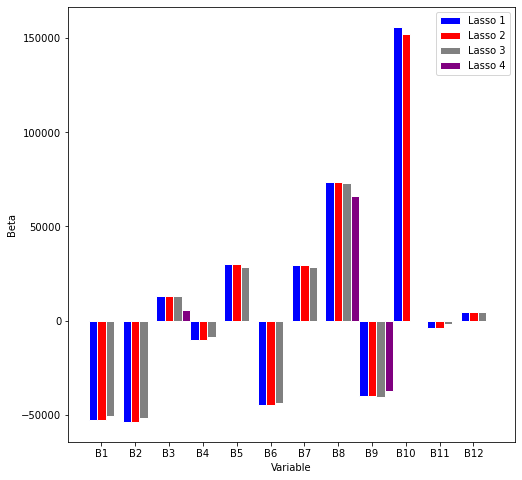

In [26]:
fig = plt.figure(figsize=(8, 8))
# ancho de barra-------------------------------------------------
barWidth = 0.25
# definir posicion barras series---------------------------------
r1 = np.arange(len(lasso_reg1.coef_))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
# pintar las barras----------------------------------------------
plt.bar(r1, lasso_reg1.coef_, color = "blue", 
width = barWidth, edgecolor = "white", label = "Lasso 1");
plt.bar(r2, lasso_reg2.coef_, color = "red", 
width = barWidth, edgecolor = "white", label = "Lasso 2");
plt.bar(r3, lasso_reg3.coef_, color = "gray", 
width = barWidth, edgecolor = "white", label = "Lasso 3");
plt.bar(r4, lasso_reg4.coef_, color = "purple", 
width = barWidth, edgecolor = "white", label = "Lasso 4");
plt.xticks([r + barWidth for r in range(len(lasso_reg1.coef_))], 
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']);
plt.legend();
plt.xlabel("Variable");
plt.ylabel("Beta");
plt.show(fig)

# Comparativa de modelos

In [27]:
mod = ['Lasso1','Lasso2','Lasso3','Lasso4']
score = [lasso_reg1.score(X,y),lasso_reg2.score(X,y),lasso_reg3.score(X,y),lasso_reg4.score(X,y)]
df = pd.DataFrame()
df['Modelo'] = mod
df['Score'] = score
df

,Modelo,Score
0,Lasso1,0.645453
1,Lasso2,0.645453
2,Lasso3,0.644924
3,Lasso4,0.553965


Elaborado por Jairo Rojas